In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'data\\train.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop('label', axis=1)
y = df['label']

In [5]:
# change the shape of the data
X = X.values.reshape(-1, 28, 28, 1)

In [6]:
X.shape

(42000, 28, 28, 1)

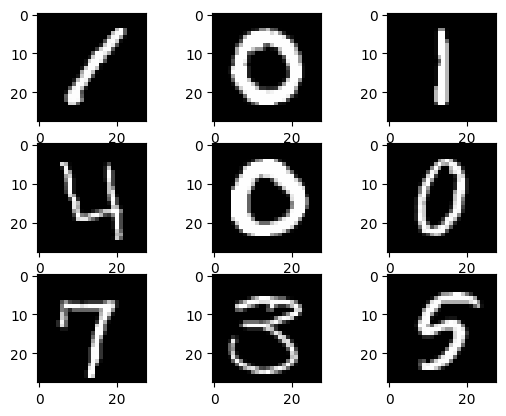

In [7]:
# plot the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
# data augementation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2
)

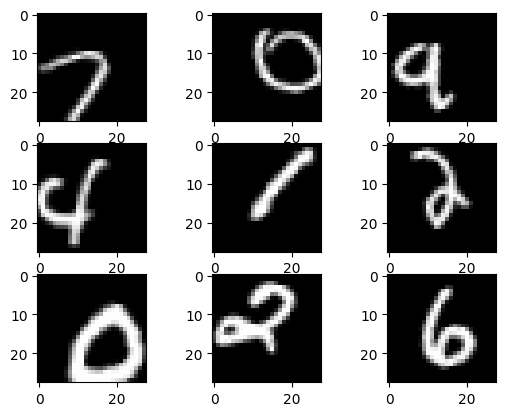

In [9]:
# fit the data
datagen.fit(X)

# append the augmented data to the original data
augmented_data = []
augmented_labels = []
batches = 0
for x_batch, y_batch in datagen.flow(X, y, batch_size=32):
    augmented_data.append(x_batch)
    augmented_labels.append(y_batch)
    batches += 1
    if batches >= 32:
        break

augmented_data = np.concatenate(augmented_data)
augmented_labels = np.concatenate(augmented_labels)

# plot the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(augmented_data[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
print(augmented_data.shape)
print(augmented_labels.shape)

(1024, 28, 28, 1)
(1024,)


In [11]:
# shape of the data
X.shape

(42000, 28, 28, 1)

In [12]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# create a CNN model using tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
1050/1050 [==============================] - 6s 3ms/step - loss: 0.5988 - accuracy: 0.8688 - val_loss: 0.1167 - val_accuracy: 0.9612
Epoch 2/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1590 - accuracy: 0.9539 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 3/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1271 - accuracy: 0.9626 - val_loss: 0.0774 - val_accuracy: 0.9754
Epoch 4/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1115 - accuracy: 0.9669 - val_loss: 0.0717 - val_accuracy: 0.9789
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0996 - accuracy: 0.9701 - val_loss: 0.0715 - val_accuracy: 0.9811
Epoch 6/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0856 - accuracy: 0.9744 - val_loss: 0.0732 - val_accuracy: 0.9787
Epoch 7/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0759 - accuracy: 0.9786 - val_loss: 0.0563 - val_ac

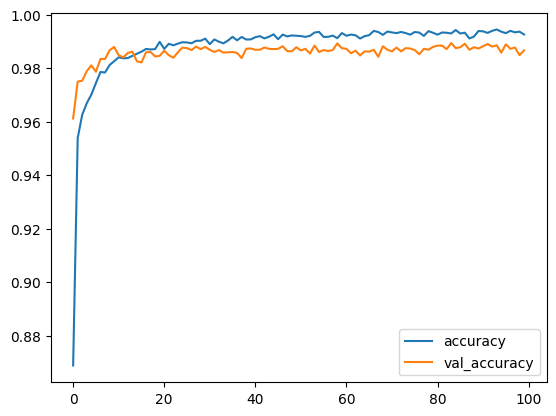

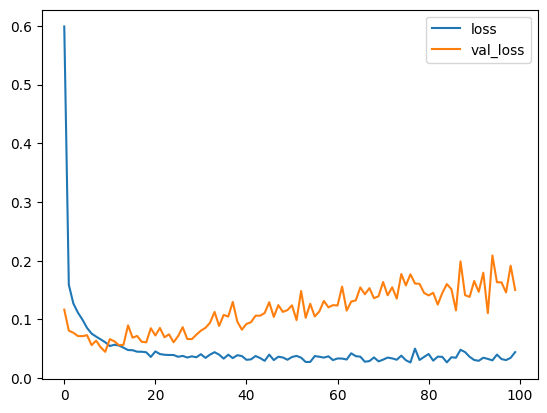

In [16]:
# plot the loss and accuracy
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [17]:
#  make predictions
y_pred = model.predict(X_test)

263/263 [==============================] - 1s 2ms/step


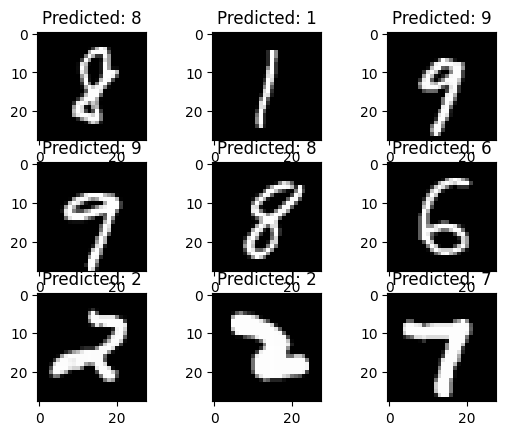

In [18]:
# plot the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.title(f'Predicted: {np.argmax(y_pred[i])}')
plt.show()

In [19]:
# load the test data
path = 'data\\test.csv'
df_sub = pd.read_csv(path)

In [20]:
X_sub = df_sub.values.reshape(-1, 28, 28, 1)

In [21]:
# make predictions
y_pred_sub = model.predict(X_sub)

875/875 [==============================] - 1s 1ms/step


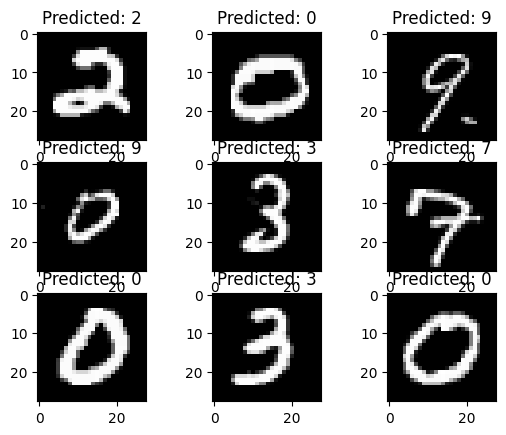

In [22]:
# plot the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_sub[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.title(f'Predicted: {np.argmax(y_pred_sub[i])}')
plt.show()


In [23]:
# create a submission file
y_pred_sub = [np.argmax(y) for y in y_pred_sub]
df_submit = pd.DataFrame({'ImageId': range(1, len(y_pred_sub) + 1), 'Label': y_pred_sub})
df_submit.to_csv('submission.csv', index=False)